# Assignment 4 - Curve fitting

In [76]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
%matplotlib inline

In [77]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n
# plt.plot(t, y, t, yn)

<ErrorbarContainer object of 3 artists>

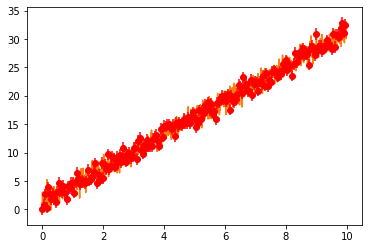

In [78]:
# Get errorbars from noise 
plt.plot(t, y, t, yn)
plt.errorbar(t[::5], yn[::5], np.std(n), fmt='ro')

# Least Squares Curve Fitting

Assume we know somei about the function that underlies the observed data (for example, that it is linear or a polynomial function).  However, we don't know the coefficients of the various terms.  For example, say our function takes two parameters $p_1$ and $p_2$, and is a linear function of the time variable $t$: $g(t, p_1, p_2) = p_1 t + p_2$.  

We have a number of *observations* $g_1, g_2, \ldots, g_n$ of this function at different time instants $t_1, t_2, \ldots, t_n$.  These observations can then be written as:

$$
\mathbf{g} \equiv
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_n
\end{pmatrix}
=
\begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_n & 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

## Mean Square Error
We can therefore define an error $\varepsilon = \mathbf{Mp}-\mathbf{g}$ (note that this is itself a vector of point-wise errors), and a *mean-square error* or MSE as:

$$
E = \varepsilon^T \varepsilon = \sum_{1}^{N} \varepsilon_i = \sum_1^N ((p_1 t_i + p_2) - g_i)^2
$$

The goal of *least squares fitting* is to find the parameters $p_i$ such that this MSE $E$ is minimized.  More details of how this works can be seen at [LibreTexts](https://math.libretexts.org/Bookshelves/Linear_Algebra/Interactive_Linear_Algebra_(Margalit_and_Rabinoff)/06%3A_Orthogonality/6.5%3A_The_Method_of_Least_Squares).

In our case, we can use the `lstsq` function from the `numpy.linalg` library.  For this, we have to construct the $\mathbf{M}$ matrix.

In [69]:
# Use column_stack to put the vectors side by side
M = np.column_stack([t, np.ones(len(t))])
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

The estimated equation is 2.9949062989971496 t + 1.2519908439315497


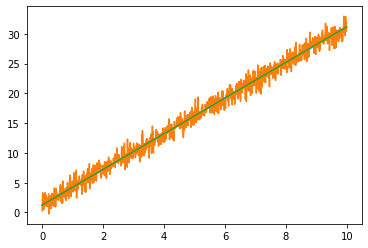

In [72]:
# Plot against the original input and compare
yest = stline(t, p1, p2)
plt.plot(t, y, t, yn, t, yest)

# Non-linear curve fitting

What if your equation was not a linear function of the parameters?  For example:
$$g(t; p_1, p_2) = e^{-p_1 t} + p_2$$

The problem here is that we cannot create the $M$ matrix as a linear combination of $p_1$ and $p_2$!  We still have a notion of MSE:

$$E = \sum_1^N (g(t; p_1, p_2) - z_t)^2$$
where $z_t$ are the observed values.  However, the least squares minimization techniques discussed earlier do not work.  

## `curve_fit`

The `scipy.optimize` library contains the `curve_fit` function that can perform a non-linear curve fitting on observed data.  Unlike the least squares method, here we need to feed in a parametrized function that can be used to estimate the parameters.  

<ErrorbarContainer object of 3 artists>

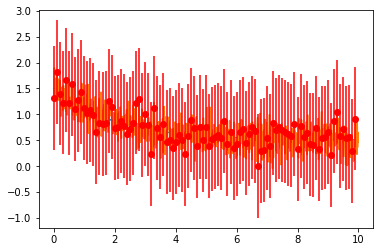

In [73]:
# Create a function with nonlinear dependence on parameters
def nlfunc(t, p1, p2):
    return np.exp(-p1 * t) + p2
z = nlfunc(t, 0.5, 0.5)
# Reuse the same noise - we are lazy
zn = z + 0.2*n
plt.plot(t, z, t, zn)
plt.errorbar(t[::10], zn[::10], np.std(n), fmt='ro')

In [74]:
# Set up the non-linear curve fit
(zp1, zp2), pcov = curve_fit(nlfunc, t, zn)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

Estimated function: exp(-0.5073662602254513t) + 0.5080991663567777


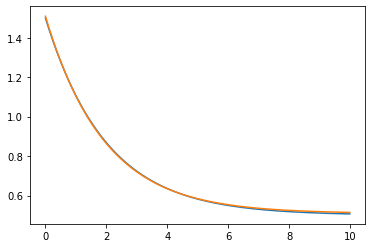

In [9]:
zest = nlfunc(t, zp1, zp2)
plt.plot(t, z, t, zest)

Estimated: 5.016697564402076 * sin(2*pi*0.5021309816604624*t)


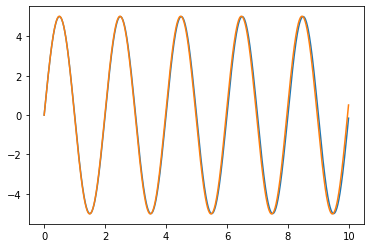

In [79]:
# Non-linear sinusoidal function
def sinfunc(t, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * t)
s = sinfunc(t, 5, 0.5)
sn = s + 0.2*n
# Fit with only first K points
K = 100
(sp1, sp2), _ = curve_fit(sinfunc, t[:K], sn[:K])
print(f"Estimated: {sp1} * sin(2*pi*{sp2}*t)")
# Regenerate data
sest = sinfunc(t, sp1, sp2)
plt.plot(t, s, t, sest)

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or somei better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

# 1. Straight Line
The dataset given clearly represents a Straight line. First we start by plotting the errorbar of the dta given taking the size of the errorbar as the standard deviation of the data.

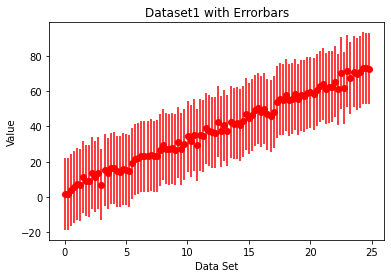

In [113]:
# Loading the dataset1 into a list using the loadtext function
data = np.loadtxt("dataset1.txt")
# Splitting the array into two list of X and Y
data_x = data[:,0]
data_y = data[:,1]

#Plot the data along with errorbars
plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')

# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset1 with Errorbars")

# Show the plot
plt.show()


## Plotting the curve fit
This is done by first defining the function that is expected to give the data points, which in this case is a straight line. Then this function along with the data points are fed into the `curve_fit` fucntion from the `scipy.optimize` library. This function returns the parameters of the equation of the plot that is to be made. These parameters are then used to plot the curve along with the dataset given.

Text(0.5, 1.0, 'Curvefit')

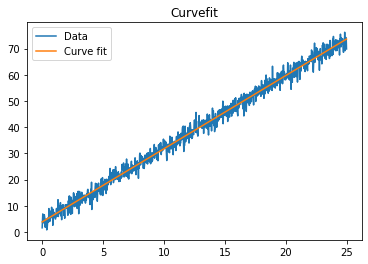

In [114]:
# Defining the equation of straight lines
def str_line(x,c,m):
    return x*m + c

# Getting the parameters of the straight line from teh curve_fit fucntion
(C,M),_ = curve_fit(str_line, data_x,data_y)

# Plottong the data along with the approximated curve
plt.plot(data_x,data_y , label = "Data")
plt.plot(data_x, M*data_x + C , label = "Curve fit")
plt.legend()
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Straight line")

# 2. Sum of sin waves 
When the plot of the dataset os made, it is clear that the data is of the sum of three sin waves.  
The errorbar uses the same concept as before and has the size of the standard deviation of the data 

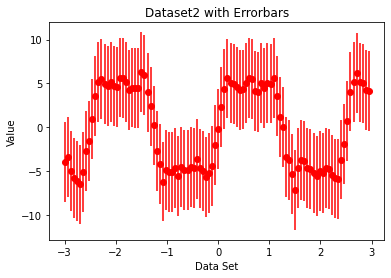

In [151]:
# Loading the dataset1 into a list using the loadtext function
data = np.loadtxt("dataset2.txt")
# Splitting the array into two list of X and Y
data_x = data[:,0]
data_y = data[:,1]

#Plot the data along with errorbars
plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')

# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset2 with Errorbars")

# Show the plot
plt.show()

### Finding the Fourier Transform to find the frequency of the sin functions in the signal
Now we approach this problem using the Fast Fourier Transfrom, which helos us isolate the distinct frequency sine waves in teh total wave that is being represented.  After the FFT the resulting data is plotted to get an idea about the Frequency domain representation of the wave

Text(0.5, 1.0, 'FFT of the sum of sines')

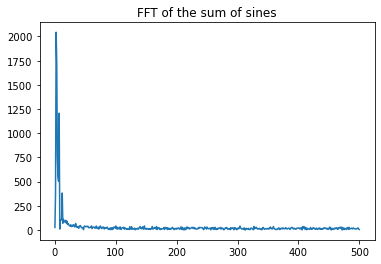

In [152]:
# Getting the length of the data
n = len(data_y)

#Making the fft of the data
yf = abs(np.fft.rfft(data_y))
xf = np.fft.rfftfreq(n, 1/n)

#PLotting this points to get an idea of the fourier transform
plt.plot(xf,yf)
plt.title("FFT of the sum of sines")  

### Filtering and finding the peaks from the Fourier data
It can be noted that the most prominent frequencies are at the very beginning and that the rest are just result of noise. This arguement is further backed by the original dataset which gives the impression of the sum of **sine** waves. Now this noise is removed by filtering the signal with some amplitude, say 250. This will reduce all the signal points that lower than 250 to 0 for and hence give the appropriate number of peaks. These peaks are then used in the next cell to make the final plot using the `curve_fit()` function.

In [143]:
#Filtering the fft output to remove the random peaks that appear due to the noise
for i in range(0,len(yf)):
    if yf[i]<250:
        yf[i] = 0

#FInding the peaks of the fft to notice the frequency of the sin wave
peaks = find_peaks(yf)

## Plotting the curve fit
This is done by first defining the function that is expected to give the data points, which in this case is the sum of 3 sine waves. Then this function along with the data points are fed into the `curve_fit` fucntion from the `scipy.optimize` library. This function returns the parameters of the equation of the plot that is to be made. These parameters are then used to plot the curve along with the dataset given.

Text(0.5, 1.0, 'Curvefit of the sum of sine')

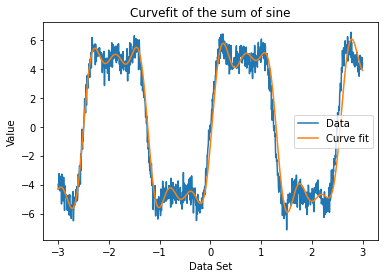

In [144]:
# Defining the function for the curve fit fucntion
def sinefunc(x,a1,a2,a3,a4,a5,a6,the1,the2,the3):
    return a1*np.sin(a2*x+the1)+a3*np.sin(a4*x+the2)+a5*np.sin(a6*x+the3)

# Getting the parameters from the curve_fit fucntion to plot it
(a1,a2,a3,a4,a5,a6,the1,the2,the3),_=curve_fit(sinefunc,data_x[:259],data_y[:259])

# Plotting the data given
plt.plot(data_x,data_y, label = "Data")

#Plotting the Approximated fucntion using curve_fit function
plt.plot(data_x,sinefunc(data_x,a1,a2,a3,a4,a5,a6,the1,the2,the3), label = "Curve fit")
plt.legend()
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Sum of sine")    

# 3. Blackbody radiation curve
A hint is given for this data set , revealing that this is the curve of the blackbody radiation experiment used to find the value of Plank's constant

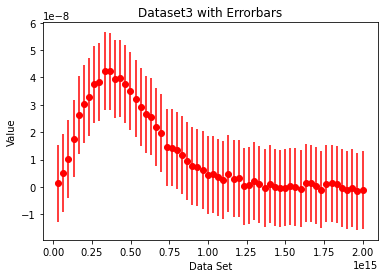

In [146]:
# Loading the dataset1 into a list using the loadtext function
data = np.loadtxt("dataset3.txt")
# Splitting the array into two list of X and Y
data_x = data[:,0]
data_y = data[:,1]

#Plot the data along with errorbars
plt.errorbar(data_x[::50] , data_y[::50], yerr=np.std(data_y), fmt='ro')

# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset3 with Errorbars")

# Show the plot
plt.show()

## Plotting the curve fit
This is done by first defining the function that is expected to give the data points, which in this case is a straight line. Then this function along with the data points are fed into the `curve_fit` fucntion from the `scipy.optimize` library. This function returns the parameters of the equation of the plot that is to be made. These parameters are then used to plot the curve along with the dataset given.

Text(0.5, 1.0, 'Black Body radiation curve')

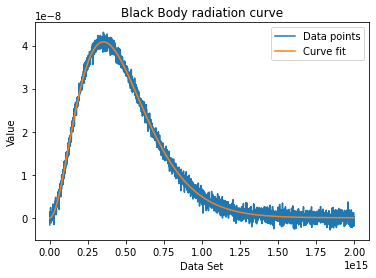

In [149]:
# Defining the function for the curve fit fucntion
def plank(mu,T,h):
    k = 1.38e-23
    c = 3.0e8
    return 2*h*mu**3/c**2*(1/(np.exp(h*mu/(k*T))-1))

# Getting the parameters from the curve_fit fucntion to plot it
(T,h),_=curve_fit(plank,data_x,data_y,p0=[2000,6.63e-34])

#Plotting all the stuff to get the result
plt.plot(data_x,data_y ,  label ="Data points")
plt.plot(data_x,plank(data_x,T,h) , label = "Curve fit")
plt.legend()
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Black Body radiation curve")  

# 4. Some Random plot
So from the data , its not really clear what the mathematical function related to this is. So I am finding the mean of Y for each value of X and then plotting it

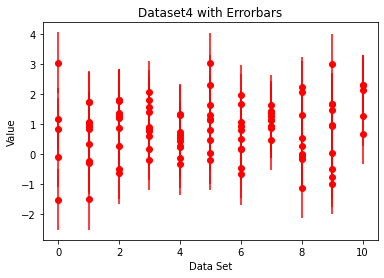

In [153]:
# Loading the dataset1 into a list using the loadtext function
data = np.loadtxt("dataset4.txt")
# Splitting the array into two list of X and Y
data_x = data[:,0]
data_y = data[:,1]

#Plot the data along with errorbars
plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')
# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset4 with Errorbars")

# Show the plot
plt.show()

## Plotting the curve fit
Not much can be infered from the above data, so I decided to make a reasonable plot by finding the mean of y for each value of x and then plotting it. This is being done in the following code cell

Text(0.5, 1.0, 'Some Randon curve')

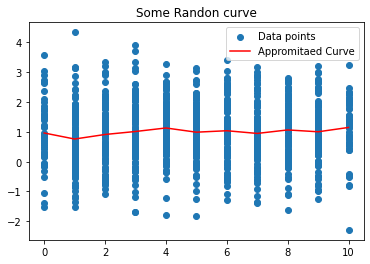

In [157]:
# Making a list of items that are unique in data_x
xr = list(set(data_x))

# Initialising a zero array of length 11
mean_y=[0,0,0,0,0,0,0,0,0,0,0]

# Finding the mean of y for each unique value of X
for x in xr:
    sum = 0
    for i in range(0,1000):
        if data[i][0] == x:
            sum += 1
    for i in range(0,1000):
        if data[i][0] == x:
            mean_y[int(x)] += data[i][1]/sum
            
#Plotting all the stuff to get proper graph        
plt.scatter(data_x,data_y , label = "Data points")
plt.plot(xr,mean_y , 'r' , label = "Appromitaed Curve" )
plt.legend()
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Some Randon curve")


The final result obtained from this is a curve that looks fine but can't really reason out why it happens.